In [1]:
import pandas as pd
import numpy as np
import numpy.random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

plt.style.use("bmh")

In [2]:
file = open(os.path.join(os.getcwd(), "data", "new_fxmm.pickle"), 'rb')
target_dict = pickle.load(file)

In [6]:
bars = []
for bkt_code in list(target_dict["bars"]):
    bars.append(target_dict["bars"][bkt_code][["Close"]].rename(columns={"Close": bkt_code}))
bars_df = pd.concat(bars, axis=1)

bars_df.tail()

,WDO1,USDCLP,USDCOP,USDZAR,USDMXN,USDHUF,USDPLN,USDCZK,USDKRW,USDCNH,...,USDTHB,USDJPY,USDAUD,USDCAD,USDNZD,USDGBP,USDNOK,USDSEK,USDEUR,USDCHF
date,,,,,,,,,,,,,,,,,,,,,
2022-12-05,5.2835,889.74,4817.21,17.4239,19.7548,394.20,4.4901,23.1662,1292.60,6.9750,...,35.037,136.75,1.4930,1.3588,1.5831,0.8204,9.9484,10.4152,0.9532,0.9426
2022-12-06,5.2378,876.58,4808.49,17.3365,19.7710,392.33,4.4807,23.2428,1319.57,6.9807,...,35.123,137.00,1.4952,1.3653,1.5816,0.8242,10.0242,10.4154,0.9554,0.9420
2022-12-07,5.2161,867.21,4823.80,17.1622,19.6764,391.15,4.4640,23.1137,1322.15,6.9619,...,34.952,136.62,1.4871,1.3653,1.5737,0.8195,10.0237,10.3882,0.9518,0.9408
2022-12-08,5.2167,864.96,4824.96,17.1659,19.6301,395.75,4.4357,23.0138,1317.65,6.9613,...,34.720,136.67,1.4772,1.3595,1.5680,0.8174,9.9658,10.3329,0.9473,0.9370
2022-12-09,5.2167,864.96,4824.96,17.3004,19.7238,395.81,4.4333,23.0105,1301.39,6.9545,...,34.746,135.76,1.4736,1.3613,1.5615,0.8149,9.9792,10.3250,0.9470,0.9325


<AxesSubplot:>

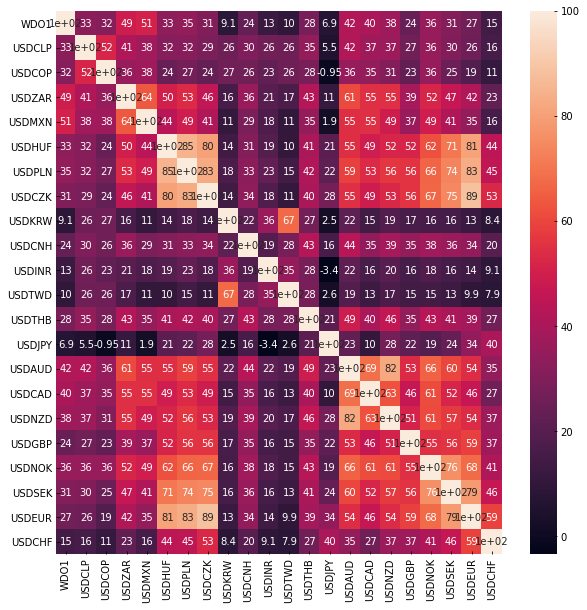

In [17]:
rets_df = bars_df.pct_change().dropna()

corr = rets_df.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr * 100, annot=True)

In [18]:
eig_val, eig_vec = np.linalg.eig(corr)

eig_val

array([9.18535462, 2.24700793, 1.61653268, 1.06983544, 0.86013622,
       0.77284267, 0.73714369, 0.70776173, 0.09601697, 0.14104049,
       0.17018075, 0.1944023 , 0.20566902, 0.5764866 , 0.52849116,
       0.5009975 , 0.48541814, 0.47863876, 0.31478691, 0.33803079,
       0.39705629, 0.37616933])

In [19]:
indices = np.arange(0,len(eig_val), 1)
indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]

eig_val

array([9.18535462, 2.24700793, 1.61653268, 1.06983544, 0.86013622,
       0.77284267, 0.73714369, 0.70776173, 0.5764866 , 0.52849116,
       0.5009975 , 0.48541814, 0.47863876, 0.39705629, 0.37616933,
       0.33803079, 0.31478691, 0.20566902, 0.1944023 , 0.17018075,
       0.14104049, 0.09601697])

In [32]:
pd.DataFrame(eig_vec)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.166725,0.131091,-0.325978,0.047510,-0.156463,0.509774,0.145658,0.320092,-0.314509,0.165098,...,-0.363383,0.035579,0.005905,-0.047094,0.019400,-0.013910,-0.008000,0.014610,-0.018125,-0.005025
1,-0.169878,0.280741,-0.096854,0.017503,-0.506048,-0.230326,-0.145092,-0.080295,0.145190,-0.214821,...,-0.571370,-0.203998,0.072959,0.068474,-0.001113,-0.024763,-0.016936,0.028217,-0.033550,0.012474
2,-0.149529,0.308801,-0.127563,-0.050913,-0.540720,-0.343893,0.023028,-0.032701,-0.057449,0.071241,...,0.494040,0.276308,-0.090987,-0.068788,-0.033380,0.078560,-0.010916,-0.009848,0.013867,-0.031631
3,-0.231915,0.122735,-0.255423,0.033888,0.067642,0.233656,0.008588,0.100464,0.086562,-0.155022,...,0.213748,-0.036683,-0.380016,-0.590231,0.163846,0.021959,-0.096019,0.042657,0.024062,-0.029146
4,-0.211385,0.129204,-0.359438,-0.070364,0.051130,0.225018,0.073745,0.063676,-0.021395,-0.114330,...,0.377847,-0.196169,0.166516,0.631217,-0.084913,0.048635,-0.006922,-0.002685,0.064887,-0.063067
5,-0.265605,-0.177223,0.059811,-0.267936,-0.049730,0.078156,-0.058264,0.131620,0.166084,-0.130587,...,-0.048763,0.271831,0.096024,-0.040476,-0.017961,-0.050763,0.642020,0.000293,0.488945,0.031011
6,-0.278831,-0.154928,0.061522,-0.261317,-0.012490,0.079534,-0.021719,0.088969,0.109924,-0.137192,...,0.040834,0.196779,0.080542,0.008735,-0.075101,-0.063246,0.147949,0.025533,-0.818300,0.165018
7,-0.270771,-0.219817,0.119408,-0.208501,-0.070077,0.023292,-0.036701,0.107130,0.047844,-0.044786,...,0.004032,0.118071,0.082339,0.038607,-0.024809,-0.168856,-0.641771,-0.080034,0.277947,0.497519
8,-0.096866,0.390124,0.419879,-0.083424,0.072779,0.062578,0.392779,0.033993,0.088819,-0.030343,...,-0.015345,0.066420,0.030986,0.153988,0.670261,-0.026496,-0.008957,0.046954,-0.008603,-0.005696
9,-0.172903,0.143852,0.081276,0.297390,0.228621,-0.313559,-0.392910,0.536527,-0.358607,0.014662,...,0.034843,0.047924,0.088036,0.072117,0.108163,-0.013119,0.041541,0.036568,-0.020760,0.020998


In [20]:
sum_eig_val = np.sum(eig_val)
explained_variance = eig_val / sum_eig_val
cumulative_variance = np.cumsum(explained_variance)

explained_variance

array([0.41751612, 0.10213672, 0.07347876, 0.04862888, 0.0390971 ,
       0.03512921, 0.03350653, 0.03217099, 0.02620394, 0.02402233,
       0.02277261, 0.02206446, 0.02175631, 0.01804801, 0.01709861,
       0.01536504, 0.0143085 , 0.00934859, 0.00883647, 0.00773549,
       0.00641093, 0.00436441])

In [23]:
pca_corr = np.dot(corr, eig_vec)
pca_corr_df = pd.DataFrame(pca_corr)

<AxesSubplot:>

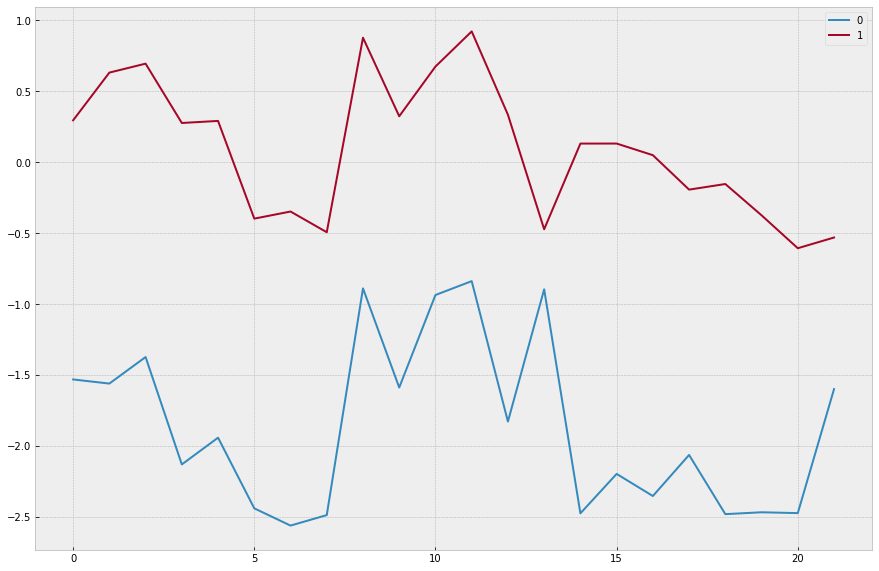

In [29]:
pca_corr_df[[0, 1]].plot(figsize=(15, 10))